In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
dataframe = pd.read_csv("./drive/MyDrive/IEEE/Final_Data1.csv")
dataset=np.array(dataframe)
Y = dataframe["0"].values
X = dataset[:,1]

In [6]:
x = []
for i in range(len(X)):
   x = x + [pd.eval(X[i])]

In [7]:
X=np.array(x).astype('float32')

In [8]:
X=np.reshape(X,(36486,31,5,1))

In [9]:
Y=pd.get_dummies(dataframe) 

In [10]:
Y=Y.iloc[:,:8]

In [11]:
Y=np.array(Y)

In [12]:
randomize = np.arange(len(X))
np.random.shuffle(randomize)
x = X[randomize]
y = Y[randomize]

In [13]:
x_train = x[0:33000]
y_train = y[0:33000]
x_test = x[33000:]
y_test = y[33000:]
x_val = x[33000:]
y_val = y[33000:]

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = tf.keras.models.Sequential()

model.add(layers.Conv2D(256, kernel_size=5, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=3, strides=2, padding='same'))

model.add(layers.Conv2D(128, kernel_size=5, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=3, strides=2, padding='same'))

model.add(layers.Conv2D(64, kernel_size=5, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=3, strides=2, padding='same'))

model.add(layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=3, strides=2, padding='same'))

model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(8, activation="softmax"))

rlrp = ReduceLROnPlateau(monitor="loss",factor=0.4, verbose=0, patience=1, min_lr=0.0000000000001)
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=200, validation_data=(x_val,y_val), batch_size=32, callbacks=[rlrp], shuffle=True)

Epoch 1/200
1032/1032 [==============================] - 8s 7ms/step - loss: 1.9182 - accuracy: 0.2353 - val_loss: 1.6830 - val_accuracy: 0.3049 - lr: 0.0010
Epoch 2/200
1032/1032 [==============================] - 9s 8ms/step - loss: 1.6939 - accuracy: 0.2972 - val_loss: 1.5998 - val_accuracy: 0.3362 - lr: 0.0010
Epoch 3/200
1032/1032 [==============================] - 10s 10ms/step - loss: 1.6273 - accuracy: 0.3315 - val_loss: 1.5694 - val_accuracy: 0.3815 - lr: 0.0010
Epoch 4/200
1032/1032 [==============================] - 8s 7ms/step - loss: 1.5693 - accuracy: 0.3586 - val_loss: 1.4786 - val_accuracy: 0.4205 - lr: 0.0010
Epoch 5/200
1032/1032 [==============================] - 7s 7ms/step - loss: 1.5195 - accuracy: 0.3807 - val_loss: 1.4240 - val_accuracy: 0.4423 - lr: 0.0010
Epoch 6/200
1032/1032 [==============================] - 7s 7ms/step - loss: 1.4771 - accuracy: 0.4020 - val_loss: 1.4124 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 7/200
1032/1032 [===========================

109/109 [==============================] - 0s 4ms/step - loss: 1.4935 - accuracy: 0.7565
Accuracy of the model :  75.64544081687927 %


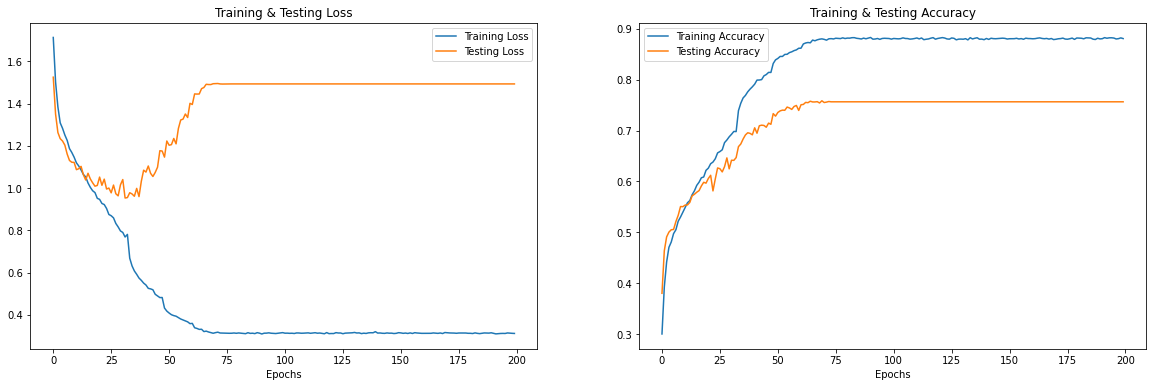

In [ ]:
print("Accuracy of the model : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model.save('./drive/MyDrive/IEEE/SER.model')

INFO:tensorflow:Assets written to: ./drive/MyDrive/IEEE/SER.model/assets


In [ ]:
predictor = keras.models.load_model('./drive/MyDrive/IEEE/SER.model')

In [ ]:
labels=['Angry','Calm','Disgust','Fear','Happy','Neutral','Sad','Surprised']

In [ ]:
pred_test = predictor.predict(x_test)

In [ ]:
actual_label = []
pred_label = []
for i in pred_test:
  pred_label.append(labels[list(i).index(max(i))])
for j in y_test:
  actual_label.append(labels[list(j).index(max(j))])
actual_label=np.array(actual_label)
pred_label=np.array(pred_label)  
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = pred_label.flatten()
df['Actual Labels'] = actual_label.flatten()
df.head(30)

,Predicted Labels,Actual Labels
0,Happy,Happy
1,Happy,Happy
2,Happy,Happy
3,Disgust,Sad
4,Sad,Sad
5,Disgust,Disgust
6,Fear,Fear
7,Sad,Fear
8,Sad,Sad
9,Happy,Happy
